In [ ]:
Github Link - 

In [44]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
# Load Data from csv
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [80]:
# Print data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4900,4901.0,26.0,1.0,74.0,90028.0,4.0,2.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4901,4902.0,26.0,0.0,54.0,96094.0,3.0,1.1,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4902,4903.0,33.0,8.0,58.0,90505.0,2.0,2.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4903,4904.0,40.0,15.0,18.0,94534.0,2.0,0.1,2.0,119.0,0.0,0.0,0.0,1.0,1.0
4904,4905.0,64.0,40.0,88.0,94305.0,1.0,3.8,1.0,243.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Print columns datatype and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
# Print Statistical Summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# Print Shape
df.shape

(5000, 14)

In [19]:
# Check null values sum per column
df.isnull().values.any()

False

In [21]:
# No of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [30]:
# No of people with zero mortgage
df[(df['Mortgage']>0)]['Mortgage'].count()

1538

In [31]:
# Number of people with zero credit card spending per month
df[(df['CCAvg']==0)]['CCAvg'].count()

106

In [35]:
# Value counts of all categorical columns
df[{'Family','Education'}].count()

Family       5000
Education    5000
dtype: int64

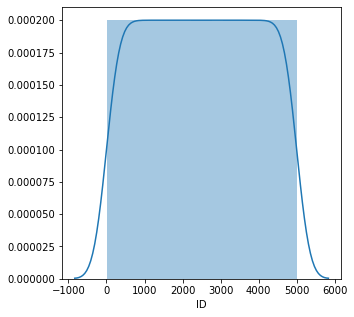

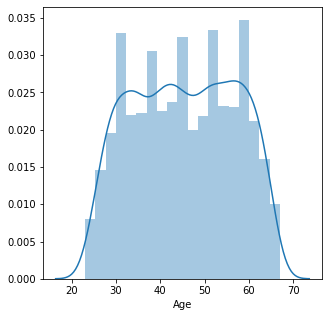

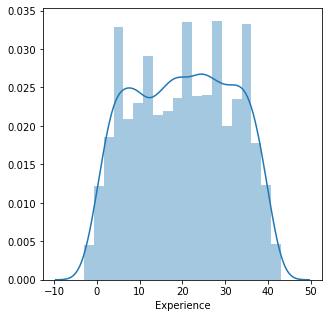

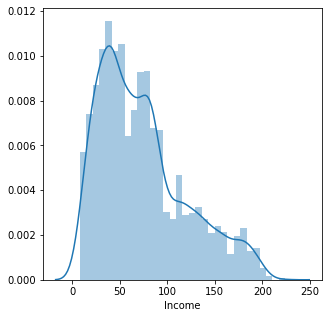

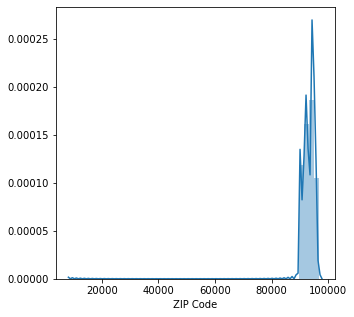

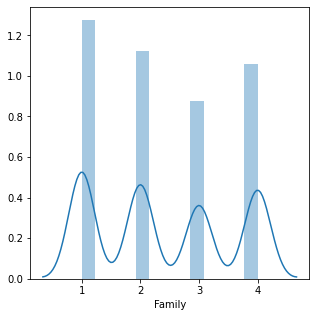

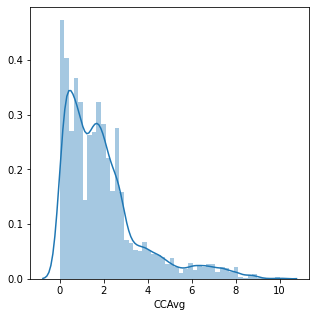

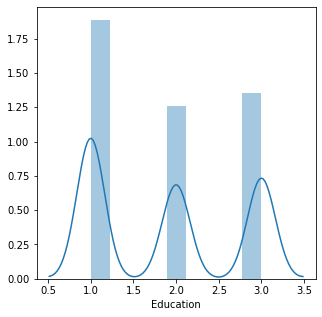

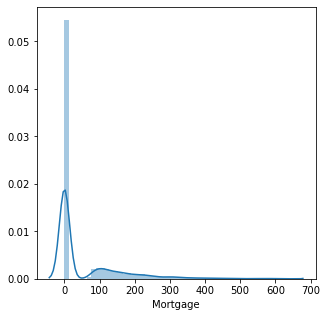

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


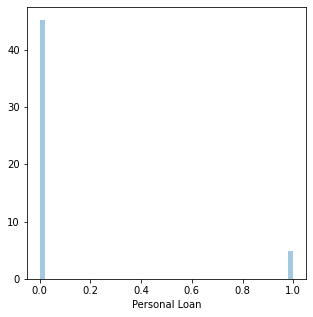

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


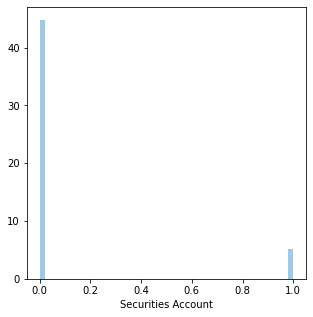

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


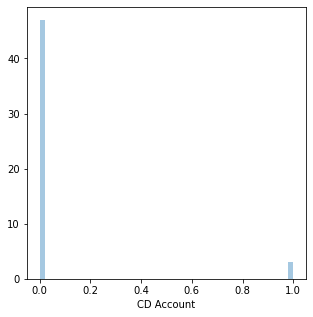

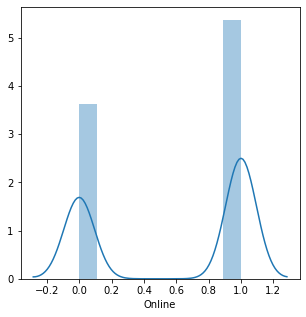

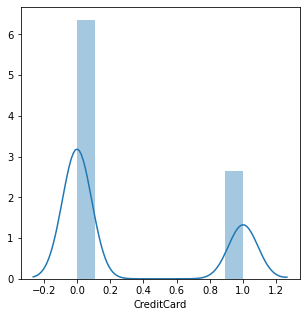

In [59]:
# Univariate Analysis
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i],)
    plt.show()

In [69]:
# From above analysis we can see some negative values in 'Experience'
df[df['Experience'] < 0]['Experience'].count()

52

In [81]:
# Replace negative Experience with column mean() in dataset
df[df['Experience'] < 0] = df['Experience'].mean()

# Check negative values again
df[df['Experience'] < 0]['Experience'].count()

0

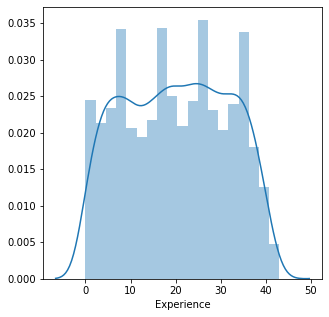

In [74]:
# Lets check graph again just for Experience column
plt.figure(figsize=(5,5))
sns.distplot(df['Experience'])
plt.show()

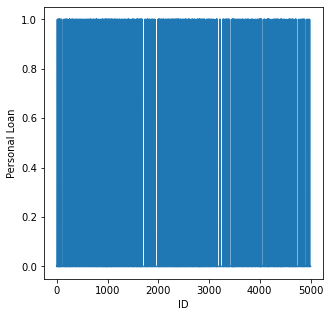

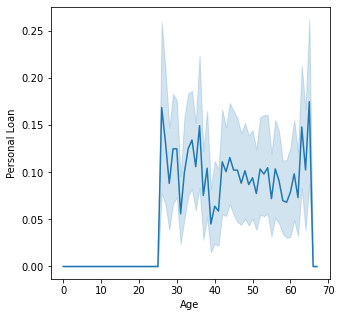

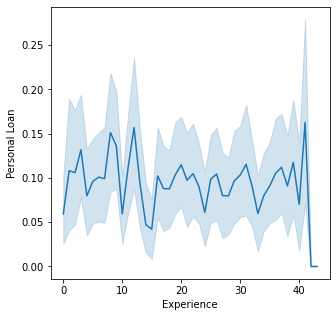

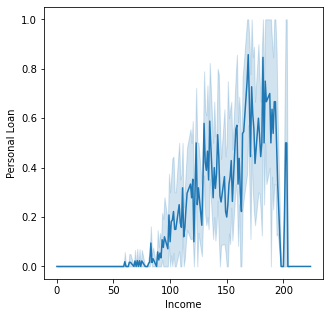

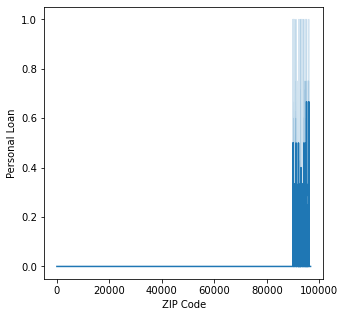

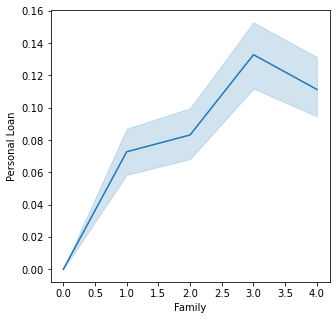

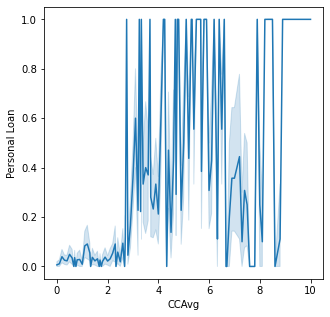

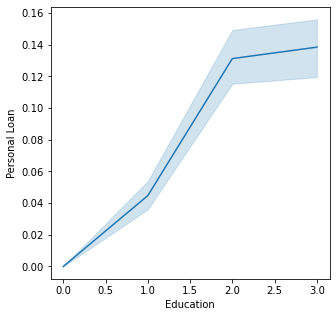

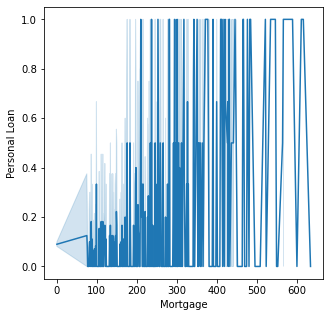

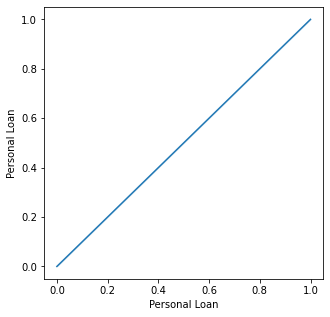

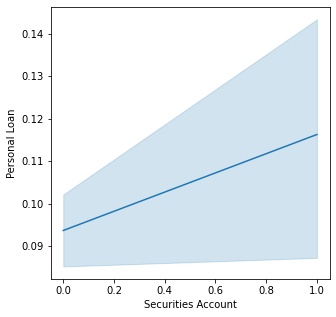

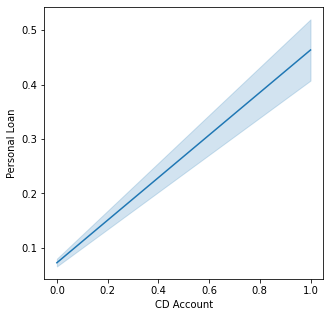

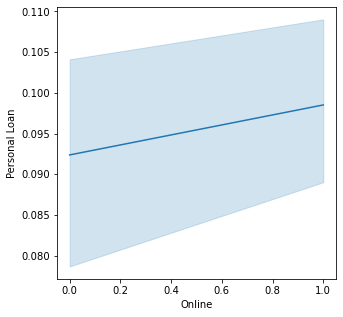

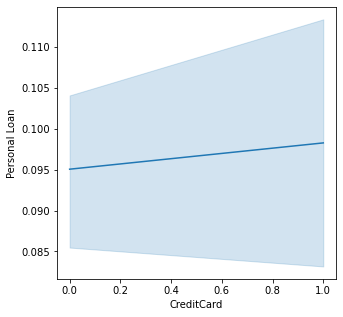

In [75]:
# Bivariate Analysis with Personal Loan as target variable
for i in df.columns:
    plt.figure(figsize = (5,5))
    sns.lineplot(x = df[i], y = df['Personal Loan'])
    plt.show() 

In [84]:
# Get data model ready, where 'Personal Loan' column is target variable.
y = df['Personal Loan']
X = df.drop('Personal Loan', axis=1)

In [85]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [90]:
# Import sklearn libraries
# Fit a model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression(random_state=7)
log_reg.fit(X_train, y_train)

G:\MyWorkSpace\Software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7)

In [122]:
# Publish metrics evaluating model performance
y_predicted = log_reg.predict(X_test)
print("Test Data Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Train Data Accuracy:",log_reg.score(X_train, y_train))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))
print("f1_Score:",metrics.f1_score(y_test, y_predicted))

Test Data Accuracy: 0.9066666666666666
Train Data Accuracy: 0.9097142857142857
Precision: 0.5652173913043478
Recall: 0.26174496644295303
f1_Score: 0.35779816513761464


In [96]:
# Predict probabilities for positive outcome (where, personal loan =1)
pos_probs = log_reg.predict_proba(X_test)[:,1]

# Publish 'roc_auc_score' only for positive outcome
print("roc_auc_score:",metrics.roc_auc_score(y_test, pos_probs))


roc_auc_score: 0.90902090919478


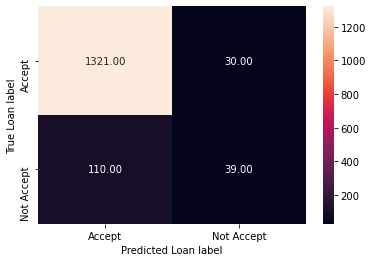

In [98]:
# Draw heatmap to display confusion matrix
cm = metrics.confusion_matrix( y_test, y_predicted)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Accept", "Not Accept"] , yticklabels = ["Accept", "Not Accept"] )
plt.ylabel('True Loan label')
plt.xlabel('Predicted Loan label')
plt.show()

In [106]:
# Calculating Coefficients against each attribute
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",log_reg.coef_.transpose())
coef_table

,0,Coefs
0,ID,0.000014
1,Age,-0.010560
2,Experience,-0.018283
3,Income,0.032503
4,ZIP Code,-0.000056
5,Family,0.067821
6,CCAvg,0.038553
7,Education,0.073194
8,Mortgage,0.000199
9,Securities Account,0.002415


In [115]:
# Publish rows from test data, where actual class not equal to predicted.
df_compare = pd.DataFrame(X_test, columns=["ID"])
df_compare["Observed Class"] = y_test
df_compare["Predicted Class"] = y_predicted

df_incorrect = df_compare[df_compare["Observed Class"] != df_compare["Predicted Class"]]
df_incorrect.head(20)


,ID,Observed Class,Predicted Class
2721,2722.0,1.0,0.0
1513,1514.0,0.0,1.0
4377,4378.0,1.0,0.0
3988,3989.0,1.0,0.0
3271,3272.0,1.0,0.0
4700,4701.0,0.0,1.0
349,350.0,1.0,0.0
927,928.0,1.0,0.0
2968,2969.0,1.0,0.0
1524,1525.0,1.0,0.0


**Conclusion**

Thera bank executives want to find ways to convert its liability customers to personal loan customers.
We can say test data and train data accuracy is almost same, which indicated that data is not under or overfit.
There is high probability that person with higher family size/income/education have higher chances of taking up personal loan.
